In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

Import data

In [8]:
df = pd.read_csv('AAPL.csv')

In [9]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
df = df.reset_index()['close']

In [15]:
df.isna().sum()

0

In [16]:
df.tail()

1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, dtype: float64

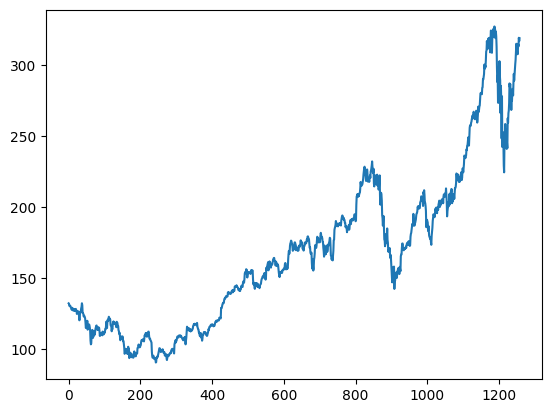

In [18]:
import matplotlib.pyplot as plt

plt.plot(df)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = np.array(df).reshape(-1,1)
df= scaler.fit_transform(x)

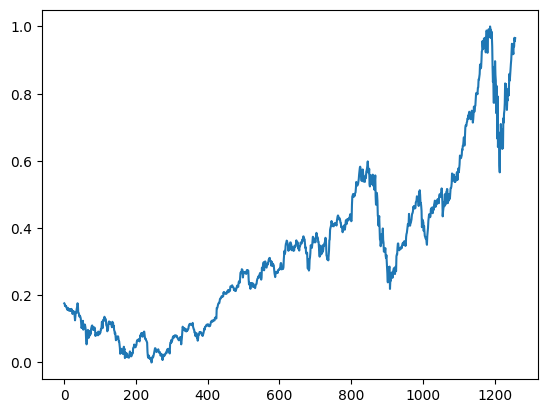

In [43]:
plt.plot(df)

In [46]:
# split dataset into training and test set

train_size= int(0.65*len(df))

train_set , test_set= df[0:train_size,] , df[train_size:len(df),]
train_set.shape

(817, 1)

In [39]:
# make iput and output from the sets

def generate_dataset(data , timesteps=1):

    x_data=[]
    y_data=[]
    k= len(data)-timesteps-1
    for i in range(k):
        alp = data[i:i+timesteps,0]
        bet = data[i+timesteps,0]

        x_data.append(alp)
        y_data.append(bet)
    return np.array(x_data),np.array(y_data)


In [48]:
x_train , y_train= generate_dataset(train_set,100)
x_test , y_test= generate_dataset(test_set,100)

print(x_train.shape)
print(x_test.shape)

(716, 100)
(340, 100)


In [49]:
# Reshape for LSTM -> (n_sample, timesteps, n_features)

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

Design LSTM stack

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0293 - val_loss: 0.0439
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 9.2352e-04 - val_loss: 0.0041
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 6.4075e-04 - val_loss: 0.0048
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 6.0677e-04 - val_loss: 0.0033
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 6.0990e-04 - val_loss: 0.0032
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.5319e-04 - val_loss: 0.0032
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 5.8151e-04 - val_loss: 0.0035
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.2911e-04 - val_loss: 0.0038
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.9170e-04 - val_loss: 0.0031
Epoch 12/50
12/12 ━━━━━━━━━━━━

In [61]:
train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
from sklearn.metrics import mean_squared_error
import math 

train_error= math.sqrt(mean_squared_error(y_train,train_predict))
test_error= math.sqrt(mean_squared_error(y_test,test_predict))

print(train_error)
print(test_error)

141.5133186462725
234.12721234413746


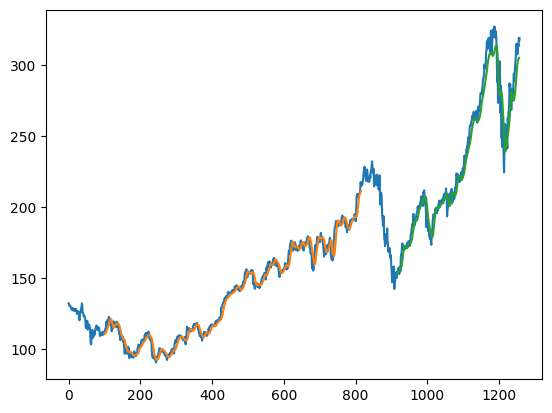

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [85]:
x_input=test_set[341:,].reshape(1,-1)
x_input.shape

(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9117052]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9